# PlotWaveforms.ipynb

### Produce a simple plot of NR beyond-GR waveforms

Maria Okounkova (mokounkova@flatironinstitute.org)

In [28]:
import matplotlib.pyplot as plt
import h5py
from astropy import constants as const
import seaborn as sns
import numpy as np
from math import pi
import matplotlib
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import InterpolatedUnivariateSpline
from ipynb.fs.full.Auxiliary import swsh, ReadExtrapolatedModes, EllinKm, PadAndProject, EllString, EvaluateSurrogate, GetPeakTime, ComputeMultiDetectorSNR

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.rcParams['axes.labelsize'] = 24
# matplotlib.rcParams['xtick.labelsize'] = 30
# matplotlib.rcParams['ytick.labelsize'] = 30
#matplotlib.rcParams['xtick.major.size'] = 20
#matplotlib.rcParams['ytick.major.size'] = 20
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['xtick.direction'] = 'in'
# matplotlib.rcParams['xtick.minor.visible'] = True
# matplotlib.rcParams['xtick.minor.size'] = 10
# matplotlib.rcParams['ytick.minor.size'] = 10
# matplotlib.rcParams['legend.fontsize'] = 18
# matplotlib.rcParams['legend.frameon'] = True
# matplotlib.rcParams['lines.linewidth'] = 3

#import gwsurrogate
#sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

### Plot the beyond-GR waveforms $h_+$, $h_\times$

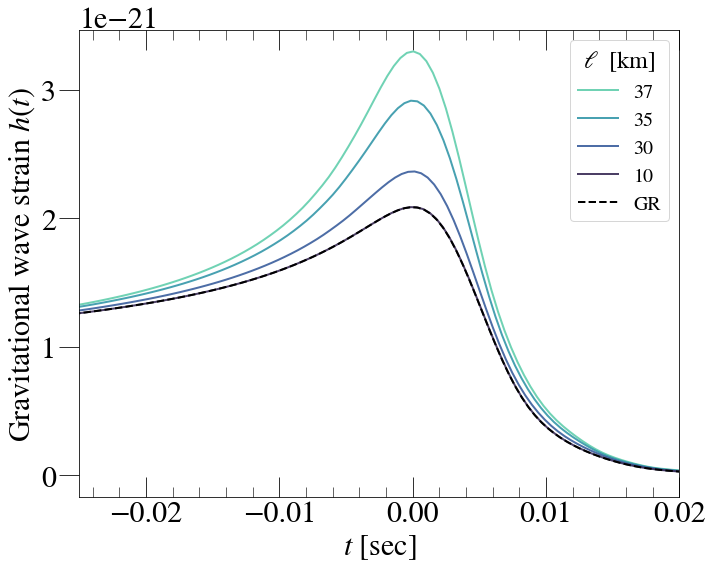

In [8]:
plt.figure(figsize=(10, 8))

params_dict = {'dist_mpc' : 400.0, 'mass' : 68.0, 'theta' : pi, 'phi' : 0, 'dt' : 1.0/2048}

ell_arr = [0.37, 0.35, 0.3, 0.1]
cs = sns.color_palette('mako_r', n_colors=len(ell_arr))

## dCS strains
for ell, c in zip(ell_arr, cs):
    
    name = str(ell).replace('.', 'p')
    file = 'Waveforms/Lev5/dCS_Strain_' + name + '.h5'
    
    ## Get physical value for ell 
    phys_ell_km = EllinKm(name, params_dict['mass'])

    time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
    plt.plot(time, h_amp, lw=2.0, label=int(phys_ell_km), color=c, alpha=0.9)

## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev2/BackgroundStrain.h5', params_dict)
plt.plot(time, h_amp, lw=2.0, ls='--', label='GR', color='black')
    
plt.xlim(-0.025, 0.02)

plt.xlabel('$t$ [sec]', fontsize=30)
plt.ylabel('Gravitational wave strain $h(t)$', fontsize=30)
legend = plt.legend(title='$\ell$  [km]', fontsize=20)
plt.setp(legend.get_title(),fontsize=24)
plt.tight_layout()
plt.savefig('dCSWaveforms.pdf')
plt.show()


### Plot beyond-GR waveforms in detectors

Not shifting or padding the time arrays
Not shifting or padding the time arrays


Not shifting or padding the time arrays


Not shifting or padding the time arrays


Not shifting or padding the time arrays


Not shifting or padding the time arrays


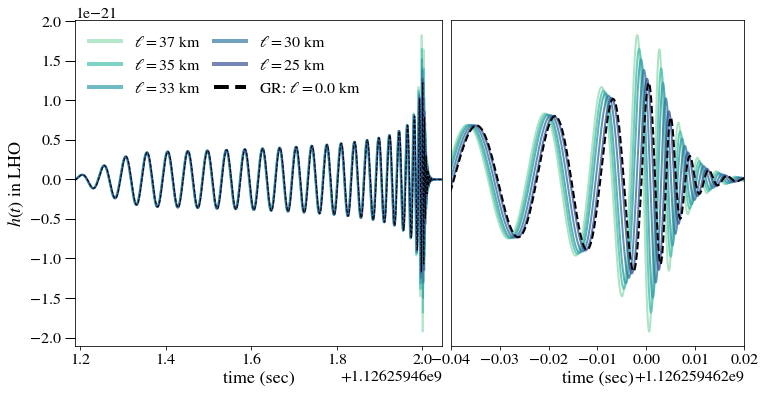

In [90]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 6), sharey = True, gridspec_kw={'width_ratios':[1.25,1]})
ax0 = axarr[0]
ax1 = axarr[1]

params_dict = {'dt' : 1/16384, 't_gps' : 1126259462.0, 'peak_time_in_segment' : 8.0, 'segment_length' : 16.0, \
               'dist_mpc' : 500.0, 'mass' : 68.0, 'q' : 1.2212532137858916, \
               'a_1' : [0, 0, 0.329892752405], 'a_2' : [0, 0, -0.439940981499], \
               'f_low' : 0, 'theta' : pi, 'phi' : 0, \
               'ra' : 1.952318922, 'dec' : -1.26967171703, 'pol' : 0.824043851821, 'f_ref' : 37.95,  'f_low' : 25.0}
t_gps = params_dict['t_gps']

## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev5/BackgroundStrain.h5', params_dict)
time_GR, hH_GR, time_GR, hL_GR, time_GR, hV_GR = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
SNR_GR = ComputeMultiDetectorSNR(time_GR, hH_GR, time_GR, hL_GR, time_GR, hV_GR)
t_peak = GetPeakTime(time_GR, hH_GR)

## dCS strains
ell_arr = [0.37, 0.35, 0.33, 0.3, 0.25]
colors = sns.color_palette('mako_r', n_colors=len(ell_arr)+2)

for ell, c in zip(ell_arr, colors):
    
    file = 'Waveforms/Lev5/dCS_Strain_' + EllString(ell) + '.h5'
    
    time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
    time, hH, time, hL, time, hV = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
    SNR = ComputeMultiDetectorSNR(time, hH, time, hL, time, hV)
    ax0.plot(time + t_gps, hH, lw=2.0, label='$\ell =  %.d$ km' % (EllinKm(EllString(ell), params_dict['mass'])), color=c, alpha = 0.7)
    ax1.plot(time + t_gps, hH, lw=2.0, label='$\ell =  %.d$ km' % (EllinKm(EllString(ell), params_dict['mass'])), color=c, alpha = 0.8)

## Plot GR strain
ax0.plot(time_GR + t_gps, hH_GR, lw=1.0, ls='--', label='GR: $\ell =  0.0$ km', color='black', alpha = 1.0)
ax1.plot(time_GR + t_gps, hH_GR, lw=2.0, ls='--', label='GR: $\ell =  0.0$ km', color='black', alpha = 1.0)
    
ax0.set_xlim(time[0] + t_gps + 0.1, time[-1] + t_gps)
ax1.set_xlim(t_gps + -0.04, t_gps + 0.02)

plt.subplots_adjust(wspace=0.025)
ax0.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis = 'y', direction='out', length=10, width=1, colors='k',
               grid_color='b', grid_alpha=0.5, labelsize=16)
ax1.tick_params(axis = 'y', direction='out', length=0, width=1, colors='b',
               grid_color='b', grid_alpha=0.5)

ax0.yaxis.get_offset_text().set_fontsize(16)
ax0.xaxis.get_offset_text().set_fontsize(16)
ax1.xaxis.get_offset_text().set_fontsize(16)

ax0.set_ylabel(r'$h(t)$ in LHO', fontsize=18)
ax0.set_xlabel(r'time (sec)', fontsize=18)
ax1.set_xlabel(r'time (sec)', fontsize=18)


leg = ax0.legend(fontsize=16, loc = 'upper left', ncol=2, frameon=False, columnspacing=0.8)
for line in leg.get_lines():
    line.set_linewidth(4)
plt.grid(False)
plt.savefig('InjectedWaveformsSameDist.pdf')
plt.show()

### Beyond-GR waveforms simple

Not shifting or padding the time arrays
Not shifting or padding the time arrays


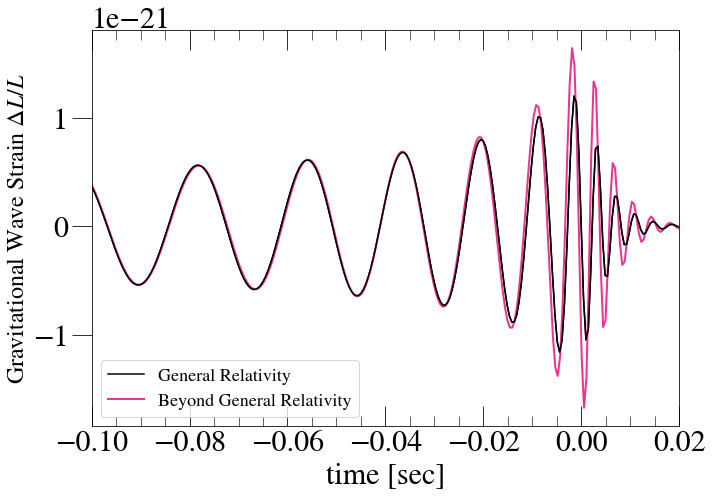

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

params_dict = {'dt' : 1/2048, 't_gps' : 1126259462.0, 'peak_time_in_segment' : 8.0, 'segment_length' : 16.0, \
               'dist_mpc' : 500.0, 'mass' : 68.0, 'q' : 1.2212532137858916, \
               'a_1' : [0, 0, 0.329892752405], 'a_2' : [0, 0, -0.439940981499], \
               'f_low' : 0, 'theta' : pi, 'phi' : 0, \
               'ra' : 1.952318922, 'dec' : -1.26967171703, 'pol' : 0.824043851821, 'f_ref' : 37.95,  'f_low' : 25.0}


## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev5/BackgroundStrain.h5', params_dict)
time_GR, hH_GR, time_GR, hL_GR = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
t_peak = GetPeakTime(time_GR, hH_GR)

## Plot GR strain
plt.plot(time_GR - t_peak - 0.0015, hH_GR, lw=1.5, ls='-', label='General Relativity', color='black')

## dCS straints
ell = 0.35
color = '#eb348f'

file = 'Waveforms/Lev5/dCS_Strain_' + EllString(ell) + '.h5'
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
time, hH, time, hL = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
plt.plot(time - t_peak, hH, lw=2.0, label='Beyond General Relativity', color=color)

## Plot GR strain one more time
plt.plot(time_GR - t_peak - 0.0015, hH_GR, lw=1.5, ls='-', color='black')

plt.xlim(-0.1, 0.02)
plt.ylabel(r'Gravitational Wave Strain $\Delta L / L$')
plt.xlabel('time [sec]', fontsize=30)
legend = plt.legend(fontsize=18, loc = 'lower left', ncol=1, frameon=True)
plt.grid(False)
plt.tight_layout()
plt.savefig('SimpleWaveforms.pdf')
plt.show()

### GW waveforms simple

Not shifting or padding the time arrays


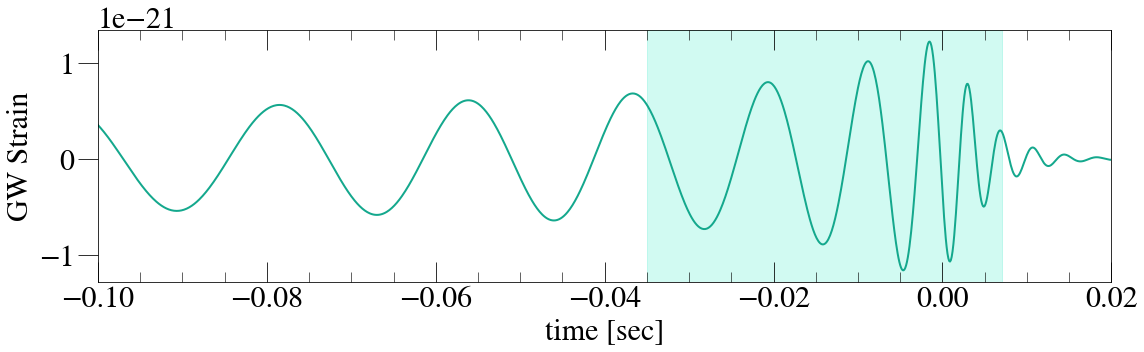

In [32]:
fig, ax = plt.subplots(figsize=(16, 5))

params_dict = {'dt' : 1/10000, 't_gps' : 1126259462.0, 'peak_time_in_segment' : 8.0, 'segment_length' : 16.0, \
               'dist_mpc' : 500.0, 'mass' : 68.0, 'q' : 1.2212532137858916, \
               'a_1' : [0, 0, 0.329892752405], 'a_2' : [0, 0, -0.439940981499], \
               'f_low' : 0, 'theta' : pi, 'phi' : 0, \
               'ra' : 1.952318922, 'dec' : -1.26967171703, 'pol' : 0.824043851821, 'f_ref' : 37.95,  'f_low' : 25.0}

## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev5/BackgroundStrain.h5', params_dict)
time_GR, hH_GR, time_GR, hL_GR = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
t_peak = GetPeakTime(time_GR, hH_GR)

## Plot GR strain
plt.plot(time_GR - t_peak - 0.0015, hH_GR, lw=2.0, ls='-', label='General Relativity', color='#14a88d')


plt.xlim(-0.1, 0.02)
plt.ylabel(r'GW Strain', fontsize = 30)
ax.axvspan(-0.035, 0.007, alpha=0.2, color='#19e6c0')
plt.xlabel('time [sec]', fontsize=30)
plt.grid(False)
plt.tight_layout()
plt.savefig('IMR.pdf')
plt.show()